In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data_filename = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Preparation and Cleaning
1.Load the file using Pandas

2.Look at some information about the data & the columns

3.Fix any missing or incorrect value

In [2]:
df = pd.read_csv(data_filename)

In [3]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Analysis points from the describe function:

1. Severity: The most frequent severity level is likely 2 (the median and all quartiles are 2), indicating that most accidents are of moderate severity.

2. Distance:The majority of accidents involve short distances, with 75% of accidents having a distance of 0.464 miles or less.This suggests that many accidents occur within a relatively small area.

3. Wind Chill: Varies significantly, with values ranging from -89°F to 207°F. Extreme values might indicate outliers or errors.

4. Visibilty: Looking at the mean it is around 10 miles and the s.d is also only +2 or -2 of the mean indicating good visibility.

5. Precipitation : Mostly low values indicating dry conditions.

6. Wind Speed: Varies from calm conditions (0 mph) to high winds (1087 mph), indicating potential outliers or incorrect data.







In [7]:
# Getting the numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

Next we try to find the percentages of missing values per column



In [48]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages


End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [49]:
print(missing_percentages.dtype)

float64


In [52]:

pd.set_option('display.max_rows', None)

Axes(0.125,0.11;0.775x0.77)


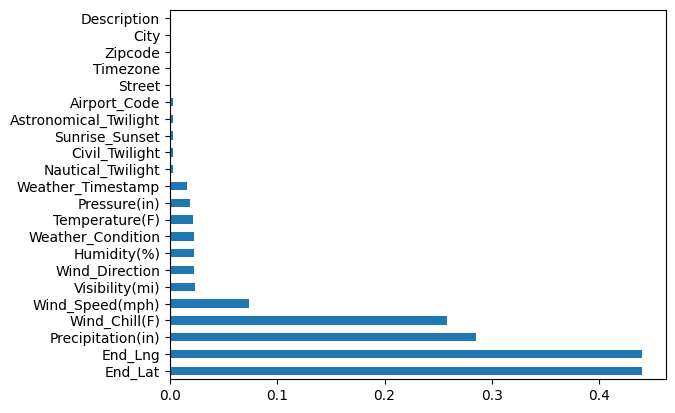

In [62]:
# here we eliminate the all the cols which have no missing values
missing_percentages_copy = missing_percentages.copy()
filtered_series = missing_percentages_copy[missing_percentages_copy != 0].plot(kind = 'barh')

print(filtered_series)

Remove columns or do not need to analyse columns which are not available 50% of the time.


## Exploratory Analysis and Visualization

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

States

In [73]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [74]:
acc_in_state_count = df.State.value_counts()
acc_in_state_count

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

Top 10 States having most no.of Accidents.

In [75]:
max_acc_state=acc_in_state_count.head(10)
max_acc_state

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

Text(0, 0.5, 'No. of cases')

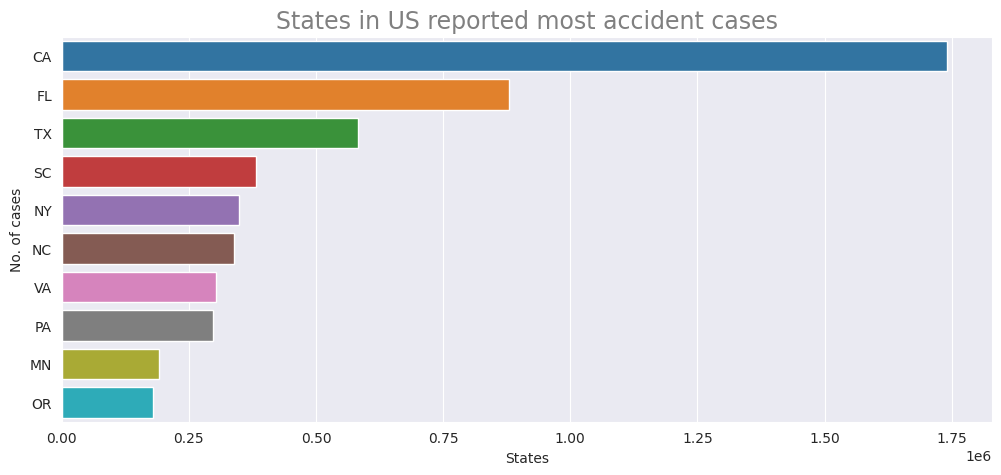

In [76]:
plt.figure(figsize=(12,5))
sns.barplot(y=max_acc_state.index, x=max_acc_state)
plt.title("States in US reported most accident cases",size=17,color="grey")
plt.xlabel('States')
plt.ylabel('No. of cases')

Text(0.5, 1.0, 'States in US reported most accident cases')

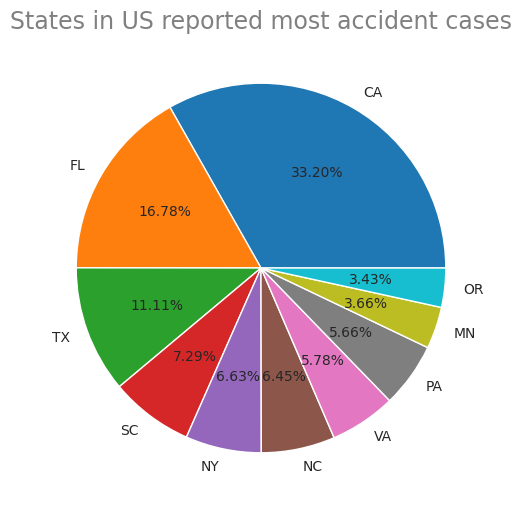

In [77]:
plt.figure(figsize=(10,6))
plt.pie(max_acc_state,labels=max_acc_state.index,autopct='%.2f%%')
plt.title("States in US reported most accident cases",size=17,color="grey")

Which timezone has the most accidents ?


In [78]:
timezone_max_acc=df['Timezone'].value_counts()
timezone_max_acc

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

Text(0, 0.5, 'No. of accidents')

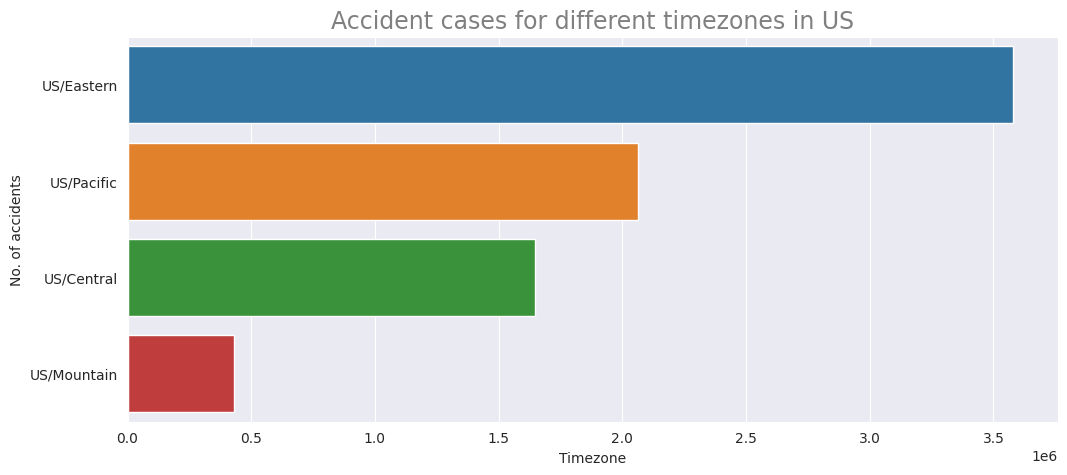

In [79]:
plt.figure(figsize=(12,5))
sns.barplot(y=timezone_max_acc.index, x=timezone_max_acc)
plt.title("Accident cases for different timezones in US",size=17,color="grey")
plt.xlabel('Timezone')
plt.ylabel('No. of accidents')

Which streets have the most no.of accidents ?


In [81]:
street_acc_count=df['Street'].value_counts()
street_max_acc=street_acc_count.head(10)
street_max_acc

Street
I-95 N     78430
I-95 S     74528
I-5 N      71968
I-10 E     55572
I-10 W     53725
I-5 S      51781
I-80 W     39662
I-80 E     36113
I-405 N    32364
I-75 N     28166
Name: count, dtype: int64

Text(0, 0.5, 'No. of accidents')

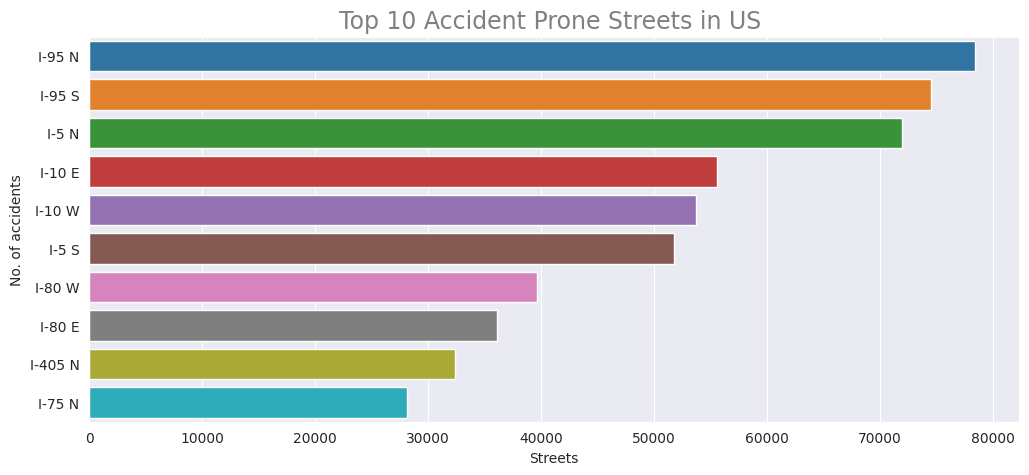

In [82]:
plt.figure(figsize=(12,5))
sns.barplot(y=street_max_acc.index, x=street_max_acc)
plt.title("Top 10 Accident Prone Streets in US ",size=17,color="grey")
plt.xlabel('Streets')
plt.ylabel('No. of accidents')

City

In [67]:
cities = df.City.unique()
len(cities)

13679

In [72]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:100]

City
Miami               186917
Houston             169609
Los Angeles         156491
Charlotte           138652
Dallas              130939
Orlando             109733
Austin               97359
Raleigh              86079
Nashville            72930
Baton Rouge          71588
Atlanta              68186
Sacramento           66264
San Diego            55504
Phoenix              53974
Minneapolis          51488
Richmond             48845
Oklahoma City        46092
Jacksonville         42447
Tucson               39304
Columbia             38178
San Antonio          37961
Greenville           37802
Saint Paul           37383
Seattle              36564
Portland             35399
San Jose             34536
Indianapolis         33219
Chicago              32035
Tampa                31193
Denver               30557
Kansas City          30107
Tulsa                28880
Riverside            27410
New Orleans          27354
Bronx                27297
Rochester            26866
Fort Lauderdale      26

<Axes: ylabel='City'>

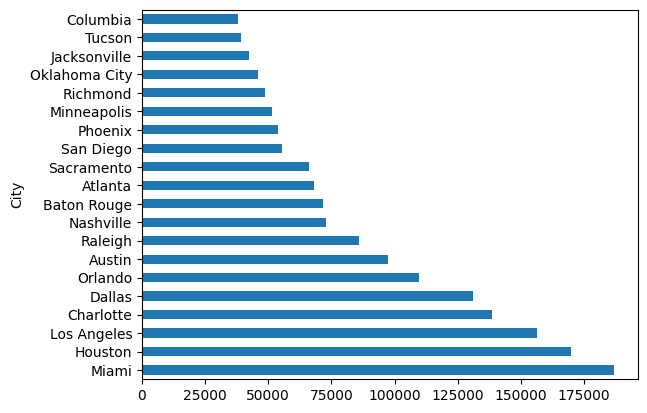

In [73]:
#graph out the cities by accident for a better understanding 

cities_by_accidents[:20].plot(kind = 'barh')

In [87]:
cities_by_accidents['New York']

21699

How would the distribution of cities by the number of accidents look like?

In [5]:
import seaborn as sns 
sns.set_style("darkgrid")

/tmp/ipykernel_33/1083794035.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accidents)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

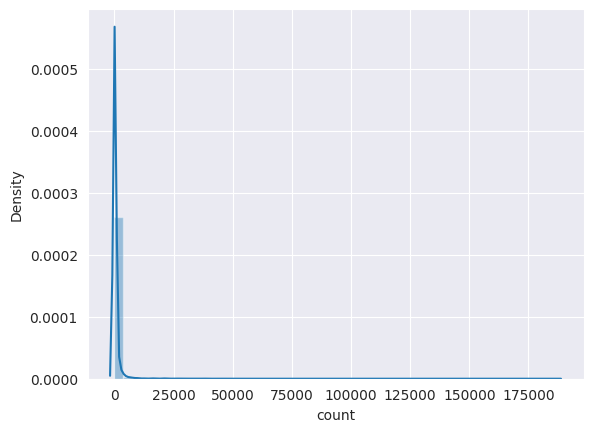

In [93]:
sns.distplot(cities_by_accidents)

Here we can see that the most of the cities have less thn 2500 accidents.
By this we know that we can create 2 buckets of cities high accidents and low accidents 

In [95]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents <= 1000]

In [99]:
len(high_accident_cities) / len (cities)


0.08882228233057972

/tmp/ipykernel_33/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

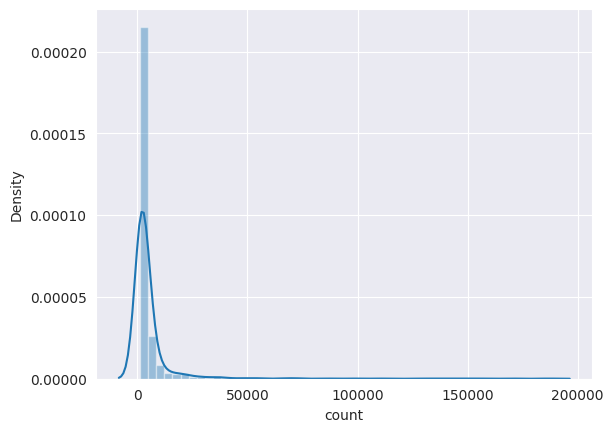

In [102]:
sns.distplot(high_accident_cities)

Out of 13000 cities just 1215 cities have accidents >1000 i.e 8% of cities have >1000 accidents
Similarly 91% of the accidents are below 1000

In [100]:
len(low_accident_cities) / len (cities)

0.9111046129103004

/tmp/ipykernel_33/469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

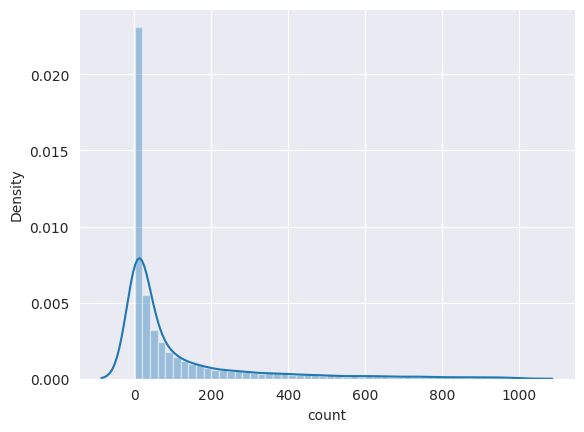

In [101]:
sns.distplot(low_accident_cities)

As we can see the graph is exponentially decreasing for both high and low 
now we let us try to better visualize it using a log scale in the histplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

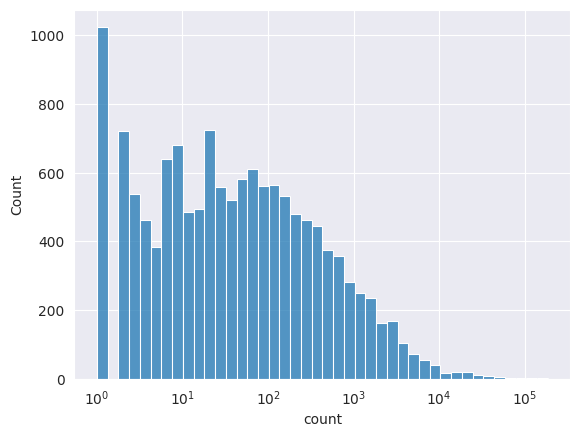

In [103]:
sns.histplot(cities_by_accidents, log_scale = True)

Final inference from this:
1. There is some missing data so the some cities are showing 0 accidents.
2. Most of the accidents occur from 10 to 1000 in the cities and keeps on decreasing further.

#### Another interesting thing to checkout is how many cities have only 1 accident (which can tell us why there is such a great height in the graph of x value 10^0)

In [106]:
cities_by_accidents[cities_by_accidents == 1].value_counts()

count
1    1023
Name: count, dtype: int64

As we can see the value is 1023 which clarified the great height of the graph at 10^0

2. Start Time

In [8]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [11]:
df.Start_Time = pd.to_datetime(df.Start_Time, format='mixed')

In [13]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

Here as each value is a timestamp we cannot analyze directly, so we use date part to analyze the hours of the day, months, year...

First let us analyse the hours 


/tmp/ipykernel_33/362819596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

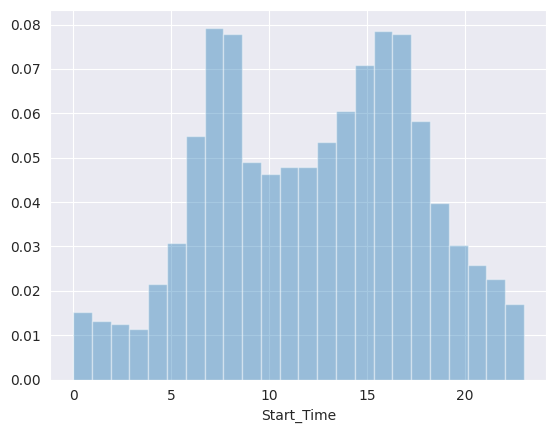

In [14]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

Analysis of the histplot for hours:
1. Most amount of accidents happen between 6 - 9 in the mornings and 4 - 6 in the evenings.(typically the office going hours)

2. The deadliest hours are between 7 - 8 in the mornings and 4 - 5 in the evenings.

Analysis by day of the week.

/tmp/ipykernel_33/308908771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

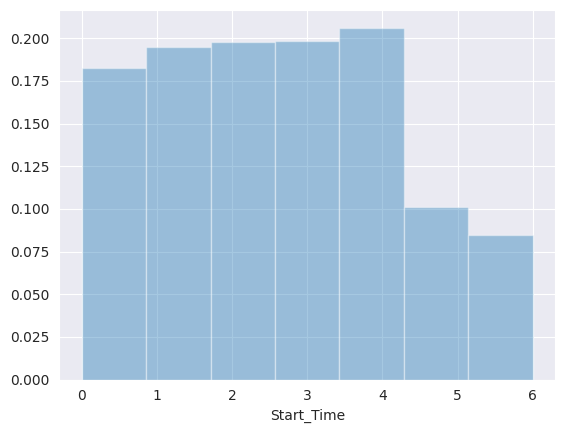

In [15]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Analysis for Day Of Week:
1. Generally from the graph a lot accidents occur in the weekdays.
2. Friday is the deadliest day of the week.
3. From Monday to Friday the accidents keep on increasing...


Is the distribution the same for by the hour in weekdays and weekends?

/tmp/ipykernel_33/3630331899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

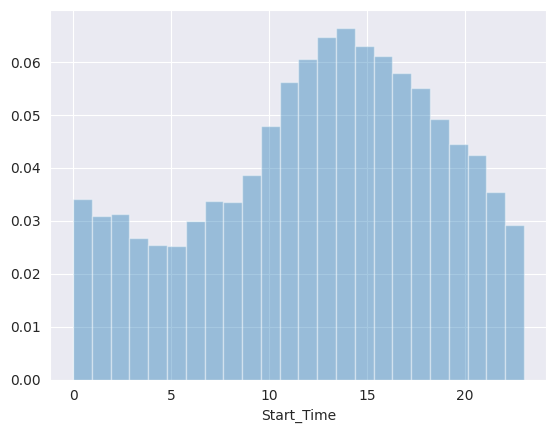

In [16]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays the distribuition is different it occurs mostly in the afternoons.

/tmp/ipykernel_33/3485319400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_times.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

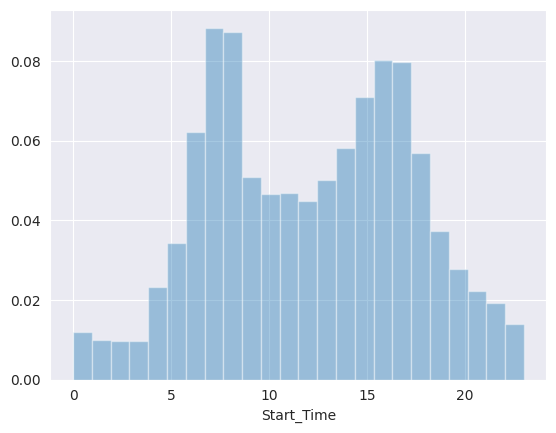

In [18]:
monday_start_times = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_times.dt.hour, bins=24, kde=False, norm_hist=True)

Analysis for the Months.

In [17]:
month_max_acc=df.Start_Time.dt.month_name().value_counts()
month_max_acc

Start_Time
December     847343
November     760165
January      751946
October      675130
February     658984
September    651381
August       599666
April        587300
June         571373
May          558176
March        554595
July         512335
Name: count, dtype: int64

1. Max no.of Accidents occur in the month of december.
2. min no.of Accidents occur in the month of July.


Text(0, 0.5, 'No. of accidents')

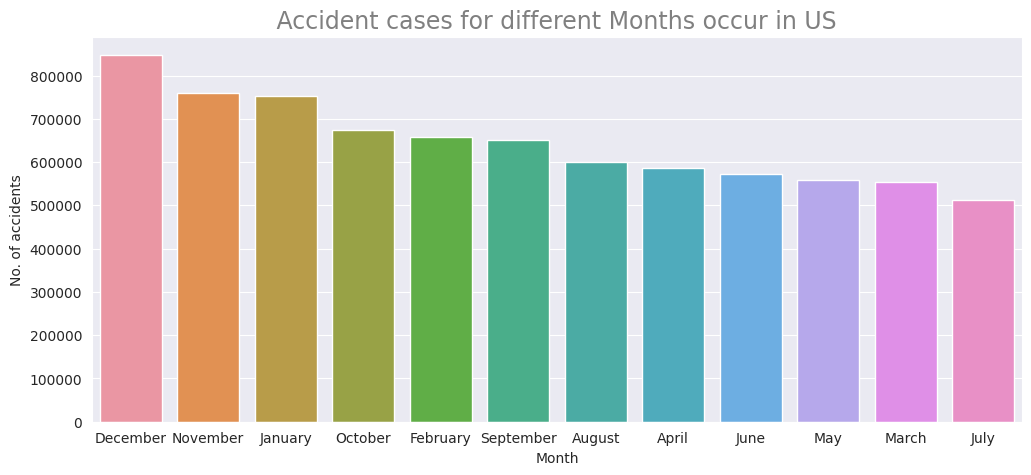

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(y=month_max_acc, x=month_max_acc.index)
plt.title(" Accident cases for different Months occur in US ",size=17,color="grey")
plt.xlabel('Month')
plt.ylabel('No. of accidents')

1. Most accidents occur at the end of the year and the start 
2. at the end of the year the number of accidents is quite high ie during december,november,october had most no of accidents

Which year had the most number of accidents ?


In [14]:
year_max_acc=df.Start_Time.dt.year.value_counts()
year_max_acc 

Start_Time
2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
2023     246633
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'No. of accidents')

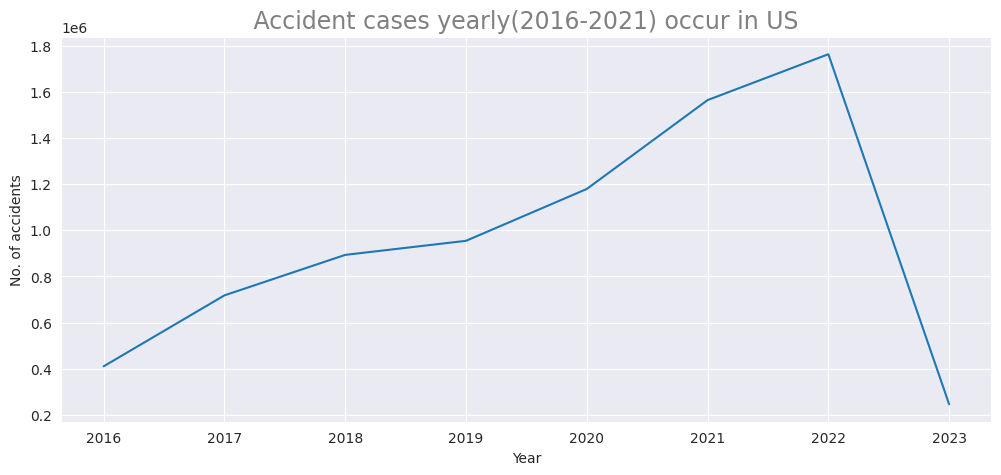

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(data=year_max_acc)
plt.title(" Accident cases yearly(2016-2021) occur in US ",size=17,color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

From the above graph we can say the following things:
1. The Number of accidents increased exponentially from 2016 - 2022
2. There was a very sudden decrease in 2023 almost going lower than 2016 (**** there might be something wrong in the data for 2023 as the full year might not be recoreded yet)
3. As we can see below the lot of values for the start times are missing for the 2023 year so we can disregard our conclusion from it.

In [51]:
df_2019 = df[df.Start_Time.dt.year == 2023]
df_2019_Bing = df_2019[df_2019.Source == 'Source2']
# print(df_2019_Bing)
# sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
# print(df_2019_Bing.Start_Time.isnull().sum())
# print(df_2019_Bing.shape)
# sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12)
# plt.show()


As we can see when we print for source 2 we do not any values.

<Axes: ylabel='count'>

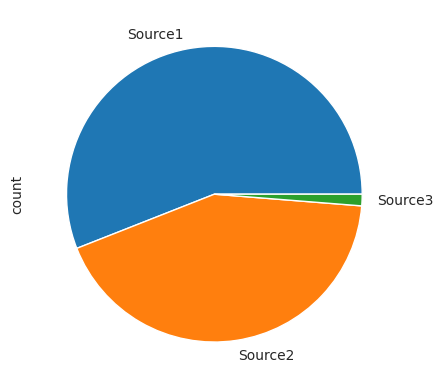

In [53]:
# Just for information let us count the number of records from each source using a pie chart 
df.Source.value_counts().plot(kind='pie')

Start Latitude and Longitude.

In [54]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [60]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

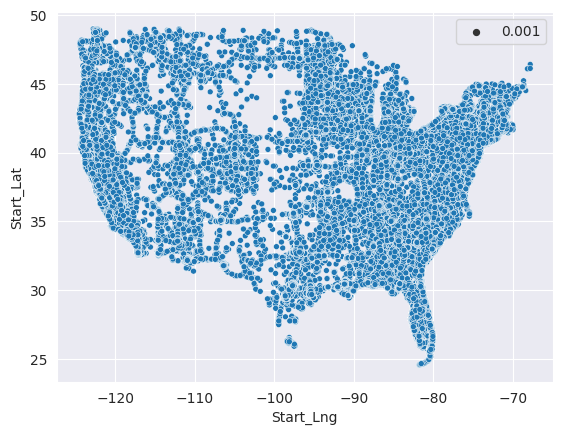

In [58]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

As we know in the US most of the population resides in the left and the right region and the population is very less in the middle hence the points are less in the middle.

In [59]:
import folium

In [61]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [70]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

127522     28.540592
1875519    46.165630
2896318    30.450026
2917690    29.734564
3334502    34.047024
             ...    
5041150    32.746803
6499096    41.574140
6957259    41.953640
6979061    37.443490
2682937    41.765327
Name: Start_Lat, Length: 100, dtype: float64
127522     -81.382446
1875519   -122.916061
2896318    -91.164375
2917690    -95.852783
3334502   -118.446587
              ...    
5041150    -97.319380
6499096    -87.483809
6957259    -87.730940
6979061    -77.581300
2682937    -72.654480
Name: Start_Lng, Length: 100, dtype: float64


In [63]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [65]:
from folium.plugins import HeatMap

In [67]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [68]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map